In [2]:
## importing the required packages
from time import time
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition

In [3]:
## Loading and curating the data
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target

In [17]:
def plot_MNIST(X, title=None):
    """scale and plot the MNIST data"""
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)  # scale the values to fit
    
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(
            X[i, 0],
            X[i, 1],
            str(digits.target[i]),
            color=plt.cm.Set1(y[i] / 10.0),
            fontdict={"weight": "bold", "size": 9},
        )
    if hasattr(offsetbox, "AnnotationBbox"):
        ## only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1.0, 1.0]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 5e-3:
                ## don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
            )
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing PCA projection


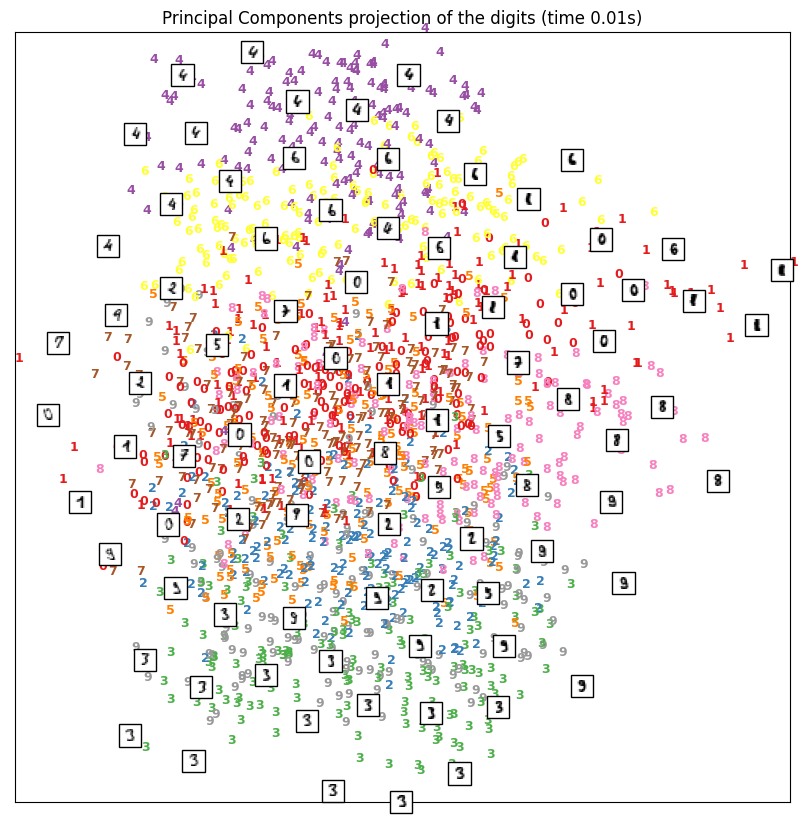

In [18]:
## Computing PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_MNIST(
    X_pca, "Principal Components projection of the digits (time %.2fs)" % (time() - t0)
)
plt.show()

Computing t-SNE embedding


C:\Users\x1897\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\x1897\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


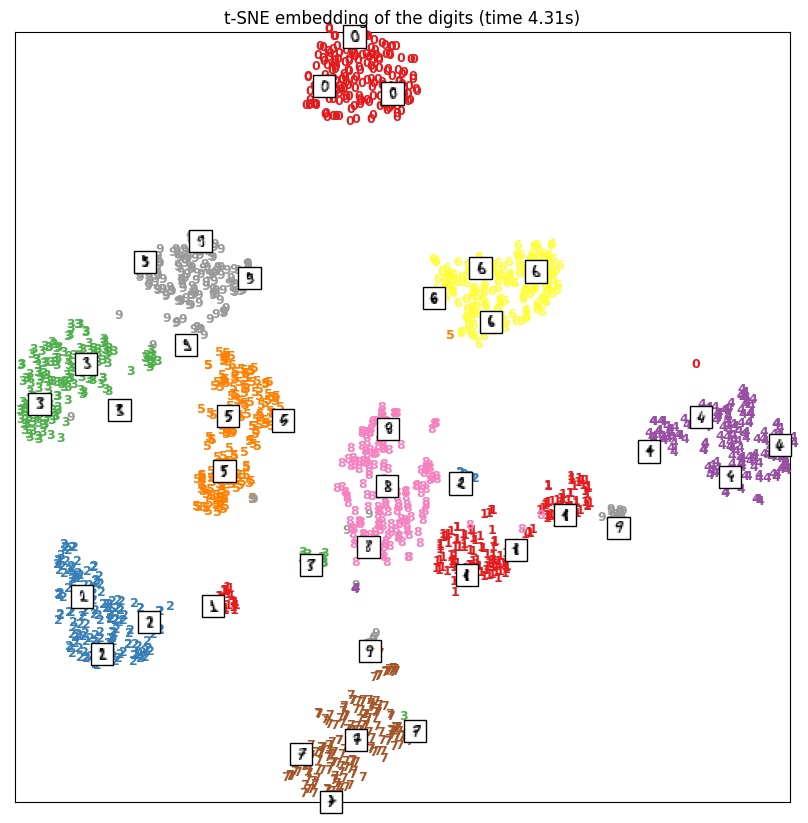

In [20]:
## Computing t-SNE
print("Computing t-SNE embedding")
t0 = time()
X_tsne = manifold.TSNE(n_components=2, init="pca").fit_transform(X)
plot_MNIST(X_tsne, "t-SNE embedding of the digits (time %.2fs)" % (time() - t0))
plt.show()